In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
W_true = 2
b_true = 0.5

In [3]:
x = np.linspace(0, 3, 130)
y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

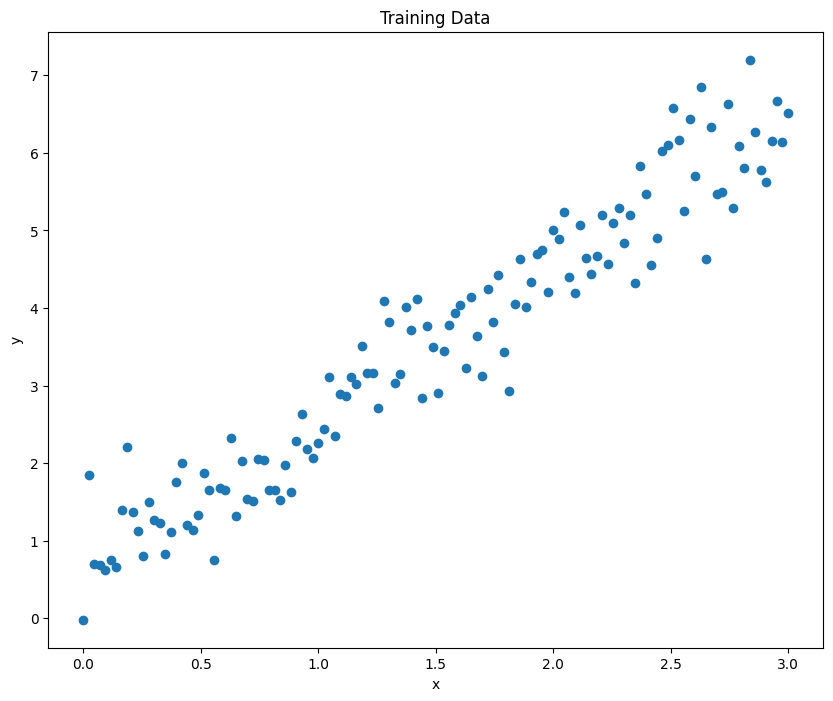

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

In [5]:
class LinearModel:
    
    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name='W')
        self.bias = tf.Variable(np.random.randn(), name='b')
        
    def __call__(self, x):
        return self.weight * x + self.bias

In [6]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [7]:
def train(linear_model, x, y, lr = 0.01):
    with tf.GradientTape() as tape:
        
        y_pred = linear_model(x)
        
        current_loss = loss(y, y_pred)
        
    d_weight, d_bias = tape.gradient(current_loss, [linear_model.weight, linear_model.bias])
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

In [14]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 100

lr = 0.15

In [15]:
for epoch_count in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())
    
    real_loss = loss(y, linear_model(x))
    
    train(linear_model, x, y, lr = lr)
    
    print(f'Epoch count {epoch_count}: Loss value {real_loss.numpy()}')

Epoch count 0: Loss value 10.452202796936035
Epoch count 1: Loss value 0.9148678779602051
Epoch count 2: Loss value 0.6637470722198486
Epoch count 3: Loss value 0.6103230118751526
Epoch count 4: Loss value 0.5665834546089172
Epoch count 5: Loss value 0.5280020236968994
Epoch count 6: Loss value 0.4939088225364685
Epoch count 7: Loss value 0.4637802839279175
Epoch count 8: Loss value 0.43715548515319824
Epoch count 9: Loss value 0.41362684965133667
Epoch count 10: Loss value 0.3928344249725342
Epoch count 11: Loss value 0.37445998191833496
Epoch count 12: Loss value 0.3582223057746887
Epoch count 13: Loss value 0.34387293457984924
Epoch count 14: Loss value 0.3311923146247864
Epoch count 15: Loss value 0.3199862539768219
Epoch count 16: Loss value 0.3100833594799042
Epoch count 17: Loss value 0.30133214592933655
Epoch count 18: Loss value 0.29359859228134155
Epoch count 19: Loss value 0.28676435351371765
Epoch count 20: Loss value 0.2807248830795288
Epoch count 21: Loss value 0.27538779

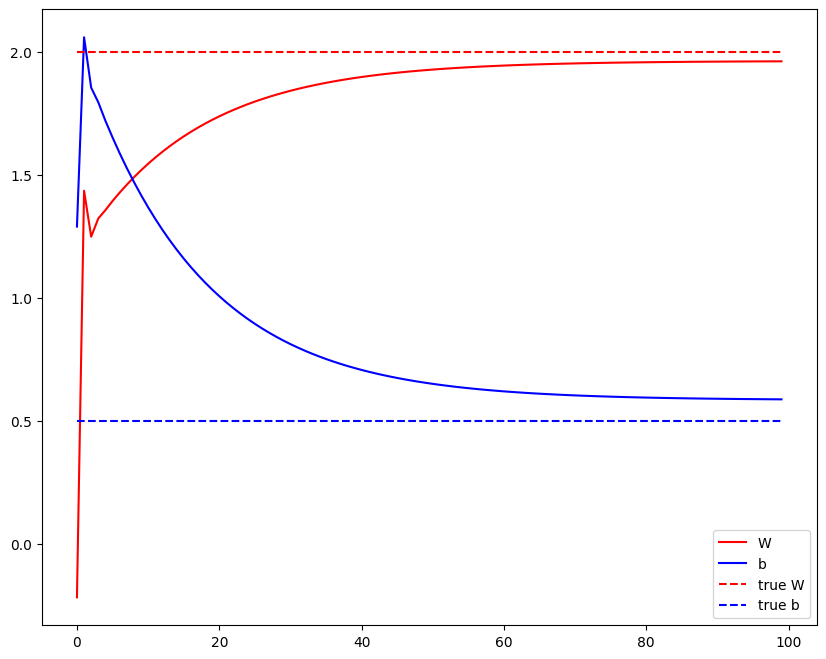

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

In [17]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(np.float32(1.9626064), np.float32(0.5871179))

In [18]:
rmse = loss(y, linear_model(x))
rmse.numpy()

np.float32(0.23483278)

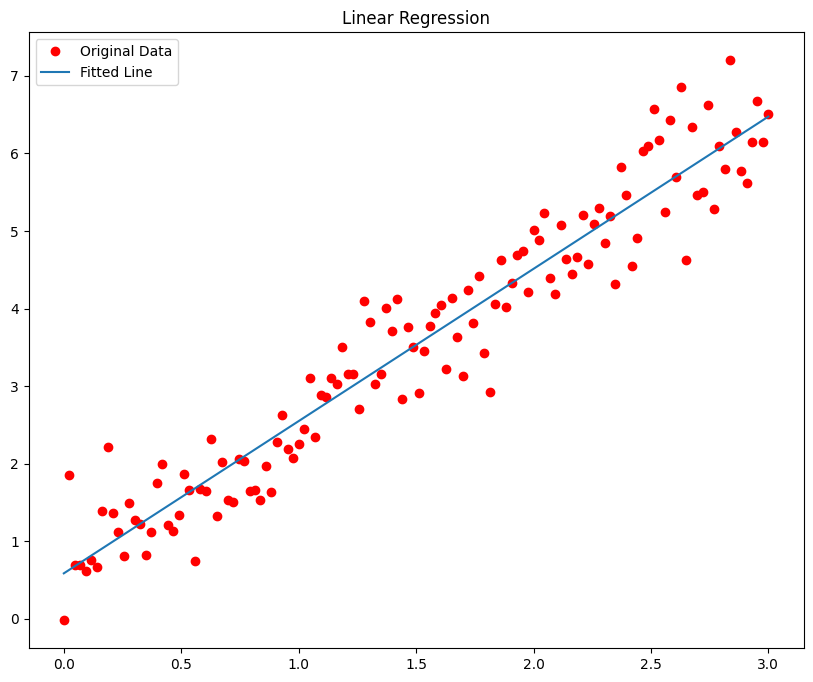

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'ro', label = 'Original Data')
plt.plot(x, linear_model(x), label= 'Fitted Line')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
x.shape, y.shape

((130,), (130,))

In [23]:
x = pd.DataFrame(x, columns=['x'])
y = pd.DataFrame(y, columns=['y'])

In [24]:
x.head

<bound method NDFrame.head of             x
0    0.000000
1    0.023256
2    0.046512
3    0.069767
4    0.093023
..        ...
125  2.906977
126  2.930233
127  2.953488
128  2.976744
129  3.000000

[130 rows x 1 columns]>

In [25]:
y.head

<bound method NDFrame.head of             y
0   -0.017840
1    1.853839
2    0.696191
3    0.692144
4    0.620368
..        ...
125  5.621859
126  6.150021
127  6.669592
128  6.144862
129  6.513370

[130 rows x 1 columns]>

In [28]:
model = keras.Sequential([layers.Dense(1, input_shape=(1, ), activation='linear')])
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='mse', metrics=['mse'], optimizer=optimizer)

C:\Users\haral\source\Repos\Getting-Started-with-Tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.fit(x, y, epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2160 - mse: 1.2160  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1307 - mse: 1.1307 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0651 - mse: 1.0651 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0365 - mse: 1.0365 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9866 - mse: 0.9866 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9587 - mse: 0.9587 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8850 - mse: 0.8850 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8074 - mse: 0.8074
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7389 - mse: 0.7389
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7120 - mse: 0.7120
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6714 - mse: 0.6714 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6489 - mse: 0.6489 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

In [30]:
y_pred = model.predict(x)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


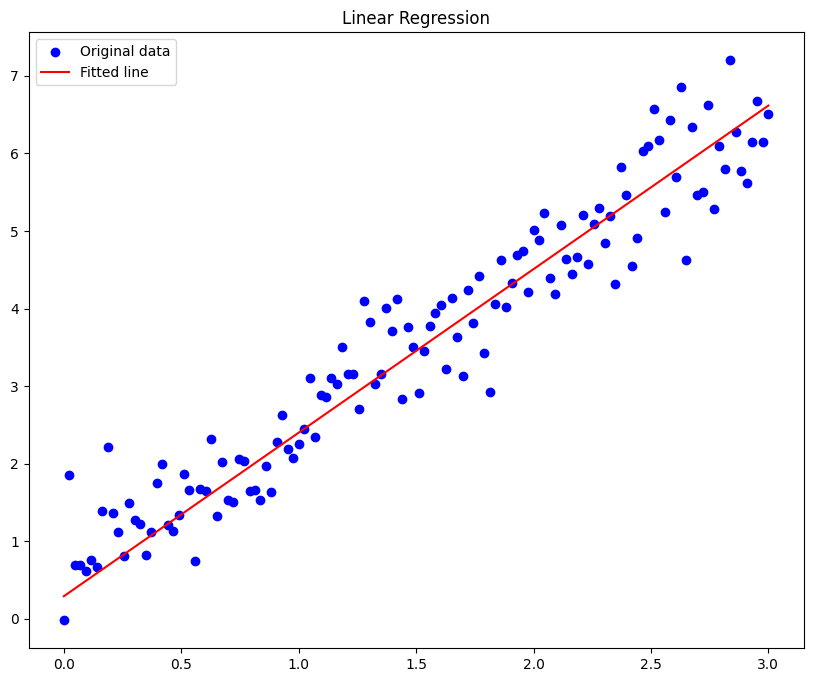

In [31]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c = 'blue', label = 'Original data')
plt.plot(x, y_pred, color = 'r', label = 'Fitted line')
plt.title('Linear Regression')
plt.legend()
plt.show()